In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
lstLogTypes=['Loss','Ex2Sec', 'Time2Batch']
batchSize=24
lstNumGPUs=[1]
lstNumNodesWK=[1,2,3,4,5]
numLogTypes=len(lstLogTypes)
numGPUs=len(lstNumGPUs)
numNodesWK=len(lstNumNodesWK)
foutCSV='results-g2.2xlarge.csv'
##
totNum=numNodesWK*numGPUs
lstCols=['numGPU', 'numWK', 'dt2Iter','numWKtot','Loss','LossV', 'Ex2Sec','Ex2SecV','Time2Batch','Time2BatchV']
data=np.zeros([totNum,len(lstCols)]) 
cnt=0
for ggi,gg in enumerate(lstNumGPUs):
    for nni,nn in enumerate(lstNumNodesWK):
        tmpRow=[]
        for tti,tt in enumerate(lstLogTypes):
            fnInp='log-Task1g-1PS-%dWK-%dGPU-%s.txt' % (nn,gg,tt)
            tdata=np.loadtxt(fnInp, dtype=np.float, delimiter=',')
            if tti==0:
                tdataTime=tdata[:,0]
                tdataIter=tdata[:,2]
                tdT=(tdataTime[-1]-tdataTime[0])/(tdataIter[-1]-tdataIter[0])/1000.
                tmpRow.append(gg)
                tmpRow.append(tdata[0,1]/gg)
                tmpRow.append(tdT)
                tmpRow.append(tdata[0,1])
            if tt=='Loss':
                tLossMean=np.mean(tdata[-1,3:])
                tLossVar =np.std(tdata[-1,3:])
                tmpRow.append(tLossMean)
                tmpRow.append(tLossVar)
            elif tt=='Ex2Sec':
                tmpVal=np.sum(tdata[:,3:],axis=1)
                tmpValMean=np.mean(tmpVal)
                tmpValVar=np.std(tmpVal)
                tmpRow.append(tmpValMean)
                tmpRow.append(tmpValVar)
            elif tt=='Time2Batch':
                tmpData=tdata[:,3:]
                tnum=tmpData.shape[1]
                tmpValMean=np.mean(tmpData)/tnum
                tmpValVar =np.std (tmpData)/tnum
                tmpRow.append(tmpValMean)
                tmpRow.append(tmpValVar)
        data[cnt,:]=np.array(tmpRow)
        cnt+=1
##
dataPD=pd.DataFrame(data,columns=lstCols)
dataPD.to_csv(foutCSV,sep=',',index=False)

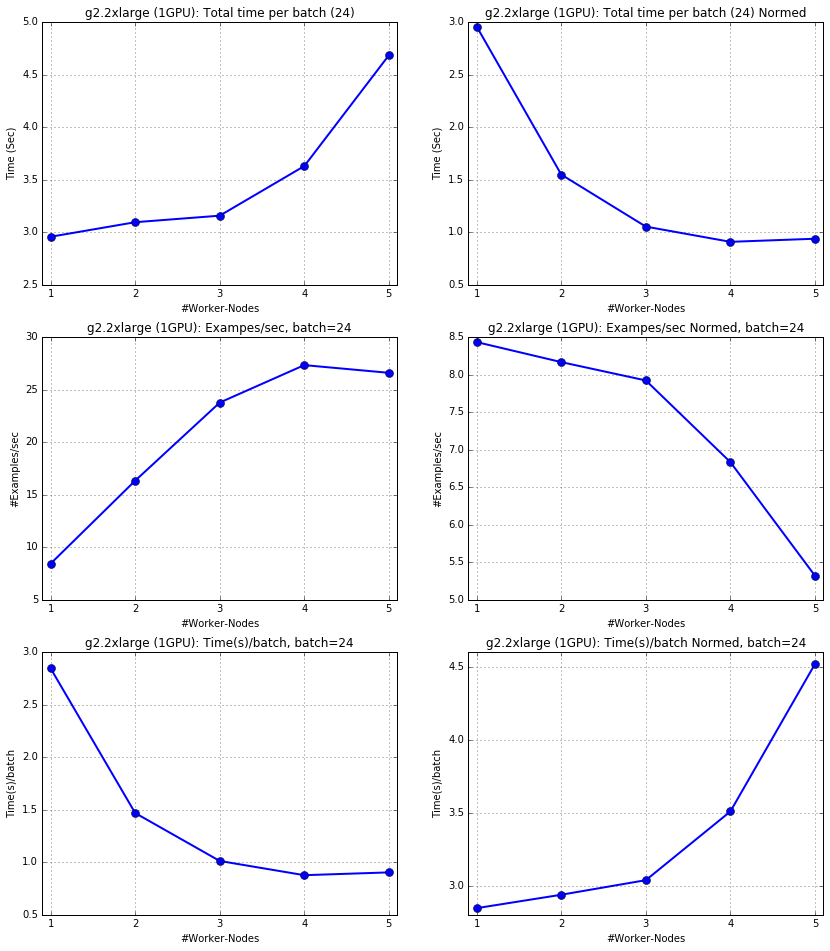

In [3]:
foutImage='plot-results-g2.8xlarge.png'
plt.figure(figsize=(14,16))
dataNumWK=dataPD['numWK']
# (1) Total time
plt.subplot(3,2,1)
plt.plot(dataNumWK,dataPD['dt2Iter'],'-o',markersize=8,lineWidth=2.)
plt.xlim((np.min(dataNumWK)-0.1,np.max(dataNumWK)+0.1))
plt.xticks(dataNumWK.astype(np.int))
plt.title('g2.2xlarge (1GPU): Total time per batch (%d)' % batchSize)
plt.xlabel('#Worker-Nodes')
plt.ylabel('Time (Sec)')
plt.grid(True)
plt.subplot(3,2,2)
plt.plot(dataNumWK,dataPD['dt2Iter']/dataNumWK,'-o',markersize=8,lineWidth=2.)
plt.xlim((np.min(dataNumWK)-0.1,np.max(dataNumWK)+0.1))
plt.xticks(dataNumWK.astype(np.int))
plt.title('g2.2xlarge (1GPU): Total time per batch (%d) Normed' % batchSize)
plt.xlabel('#Worker-Nodes')
plt.ylabel('Time (Sec)')
plt.grid(True)
# (2) Examples/Second
plt.subplot(3,2,3)
plt.plot(dataNumWK,dataPD['Ex2Sec'],'-o',markersize=8,lineWidth=2.)
plt.xlim((np.min(dataNumWK)-0.1,np.max(dataNumWK)+0.1))
plt.xticks(dataNumWK.astype(np.int))
plt.title('g2.2xlarge (1GPU): Exampes/sec, batch=%d' % batchSize)
plt.xlabel('#Worker-Nodes')
plt.ylabel('#Examples/sec')
plt.grid(True)
plt.subplot(3,2,4)
plt.plot(dataNumWK,dataPD['Ex2Sec']/dataNumWK,'-o',markersize=8,lineWidth=2.)
plt.xlim((np.min(dataNumWK)-0.1,np.max(dataNumWK)+0.1))
plt.xticks(dataNumWK.astype(np.int))
plt.title('g2.2xlarge (1GPU): Exampes/sec Normed, batch=%d' % batchSize)
plt.xlabel('#Worker-Nodes')
plt.ylabel('#Examples/sec')
plt.grid(True)
# (3) Time for Batch
plt.subplot(3,2,5)
plt.plot(dataNumWK,dataPD['Time2Batch'],'-o',markersize=8,lineWidth=2.)
plt.xlim((np.min(dataNumWK)-0.1,np.max(dataNumWK)+0.1))
plt.xticks(dataNumWK.astype(np.int))
plt.title('g2.2xlarge (1GPU): Time(s)/batch, batch=%d' % batchSize)
plt.xlabel('#Worker-Nodes')
plt.ylabel('Time(s)/batch')
plt.grid(True)
plt.subplot(3,2,6)
plt.plot(dataNumWK,dataPD['Time2Batch']*dataNumWK,'-o',markersize=8,lineWidth=2.)
plt.xlim((np.min(dataNumWK)-0.1,np.max(dataNumWK)+0.1))
plt.xticks(dataNumWK.astype(np.int))
plt.title('g2.2xlarge (1GPU): Time(s)/batch Normed, batch=%d' % batchSize)
plt.xlabel('#Worker-Nodes')
plt.ylabel('Time(s)/batch')
plt.grid(True)
#
plt.savefig(foutImage)